**Data Science with Machine Learning Techniques**

---



# **1. Try 1**

In [2]:
# import libaries
from sklearn.neural_network import MLPClassifier

In [3]:
# set x and y
X = [[0., 0.], [1., 1.]]
y = [0, 1]

In [4]:
# create the MLPClassifier instance
clf = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(5, 2),
    random_state=1
)

In [5]:
# train the model
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [6]:
# predict
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

# **2. Try 2**

In [7]:
# import libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [8]:
# generate a random n-class classification
X, y = make_classification(
    n_samples=100,
    random_state=1
)

In [9]:
# split the data into train and test set equally
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [10]:
# train the model
clf = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(5, 2),
    random_state=1
)

In [11]:
# train the model
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [12]:
# predict
clf.predict_proba(X_test[:1])

array([[0., 1.]])

In [13]:
# check score
clf.score(X_test, y_test)

0.88

# **3. Try 3**

In [14]:
# import libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt

In [15]:
# load data
X, y = fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True,
    as_frame=False,
    parser='pandas'
)

In [16]:
# normalize the pixel values so that each pixel value is between 0 and 1
X = X /225.0

In [17]:
# split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=0,
    test_size=0.3
)

In [18]:
# create an instance
mlp = MLPClassifier(
    hidden_layer_sizes=(40, ),
    max_iter=8,
    alpha=1e-4,
    solver='sgd',
    verbose=10,
    random_state=1,
    learning_rate_init=0.2
)

In [19]:
# catch warining
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.30483325
Iteration 2, loss = 0.15028225
Iteration 3, loss = 0.12032935
Iteration 4, loss = 0.10544167
Iteration 5, loss = 0.08971278
Iteration 6, loss = 0.07963491
Iteration 7, loss = 0.07319747
Iteration 8, loss = 0.06600627


In [20]:
# evaluate score
print('Training set score: %f' % mlp.score(X_train, y_train))
print('Test set score: %f' % mlp.score(X_test, y_test))

Training set score: 0.980510
Test set score: 0.961095


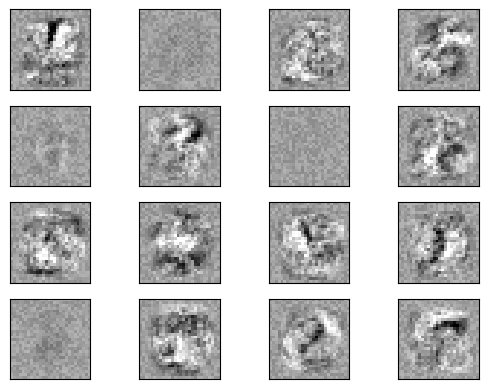

In [21]:
# plot
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28),
               cmap=plt.cm.gray,
               vmin=0.5*vmin,
               vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [22]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)